# Coastal change in African countries

* **Products used:** [DE Africa Coastlines]()



## Background

Coastline change can be summarised in country scale to assess trends of change. 

## Description

Coastlines data is downloaded and used for analysis so its not impacted by limited number of features returned by WFS.

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages
Import Python packages that are used for the analysis.

In [2]:
import geopandas as gpd
import rioxarray as rxr
import numpy as np
from deafrica_tools.spatial import xr_rasterize
from deafrica_tools.coastal import get_coastlines
#from deafrica_tools.plotting import display_map
from datacube.utils.geometry import Geometry

from matplotlib import pyplot as plt
import matplotlib as mpl


/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [3]:
african_countries  = gpd.read_file("../Supplementary_data/MGCI/african_countries.geojson")

In [4]:
african_countries.COUNTRY.values

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic',
       'Chad', 'Comoros', 'Congo-Brazzaville', 'Cote d`Ivoire',
       'Democratic Republic of Congo', 'Djibouti', 'Egypt',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia',
       'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Morocco',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Somalia',
       'South Africa', 'Sudan', 'Swaziland', 'Tanzania', 'Togo',
       'Tunisia', 'Uganda', 'Western Sahara', 'Zambia', 'Zimbabwe'],
      dtype=object)

In [10]:
change_geomorph  = gpd.read_file("~/dev/data/deafricacoastlines_rates_of_change_geomorph.gpkg")

In [13]:
change_geomorph.head()

,uid,rate_time,sig_time,se_time,outl_time,dist_2000,dist_2001,dist_2002,dist_2003,dist_2004,...,GeomorphObs,GeomorphPreds,GeomorphProbs,n_2,distance_2,feature_x_2,feature_y_2,nearest_x_2,nearest_y_2,geometry
0,sv0e5jprxn,-0.19,0.004,0.06,2016 2018 2019,3.11,1.34,1.79,1.55,0.83,...,None,Bedrock,0.634478,1.0,10.550980,3.337965e+06,3.511650e+06,3.337957e+06,3.511658e+06,POINT (3337964.536 3511650.480)
1,sv0e5jr8u3,-0.33,0.013,0.12,2019,3.08,0.94,1.69,0.74,-1.36,...,None,Bedrock,0.634478,1.0,11.289599,3.337986e+06,3.511672e+06,3.337978e+06,3.511680e+06,POINT (3337985.922 3511671.507)
2,sv0e5jrcce,-0.30,0.105,0.17,None,2.46,-0.39,0.97,-0.46,-1.82,...,None,Bedrock,0.634478,1.0,11.120898,3.338008e+06,3.511692e+06,3.338000e+06,3.511700e+06,POINT (3338007.608 3511692.203)
3,sv0e5jrfyy,-0.04,0.444,0.05,None,2.33,0.27,0.25,-0.92,-0.55,...,None,Bedrock,0.634478,1.0,10.787523,3.338029e+06,3.511713e+06,3.338022e+06,3.511721e+06,POINT (3338029.177 3511713.014)
4,sv0e5m2h5c,-0.04,0.282,0.04,None,2.55,1.20,0.71,0.26,-0.01,...,None,Bedrock,0.634478,1.0,10.211307,3.338051e+06,3.511734e+06,3.338044e+06,3.511741e+06,POINT (3338050.593 3511734.009)


In [30]:
beach = change_geomorph[(change_geomorph.GeomorphPreds == 'Beach') & (change_geomorph.GeomorphProbs > 0.5) & (change_geomorph.sig_time<0.01)]
bedrock = change_geomorph[(change_geomorph.GeomorphPreds == 'Bedrock') & (change_geomorph.GeomorphProbs > 0.5) & (change_geomorph.sig_time<0.01)]
wetland = change_geomorph[(change_geomorph.GeomorphPreds == 'Wetland') & (change_geomorph.GeomorphProbs > 0.5) & (change_geomorph.sig_time<0.01)]

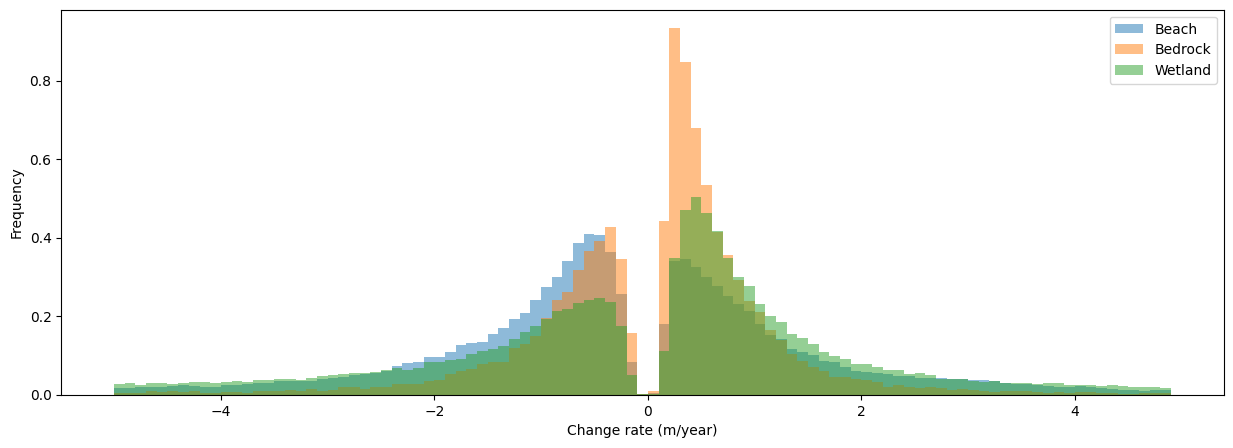

In [44]:
beach.rate_time.plot.hist(alpha=0.5, bins=np.arange(-5,5,0.1), label='Beach', legend=True, figsize=(15,5), density=True);
bedrock.rate_time.plot.hist(alpha=0.5, bins=np.arange(-5,5,0.1), label='Bedrock', legend=True, density=True);
wetland.rate_time.plot.hist(alpha=0.5, bins=np.arange(-5,5,0.1), label='Wetland', legend=True, density=True);
plt.xlabel('Change rate (m/year)');

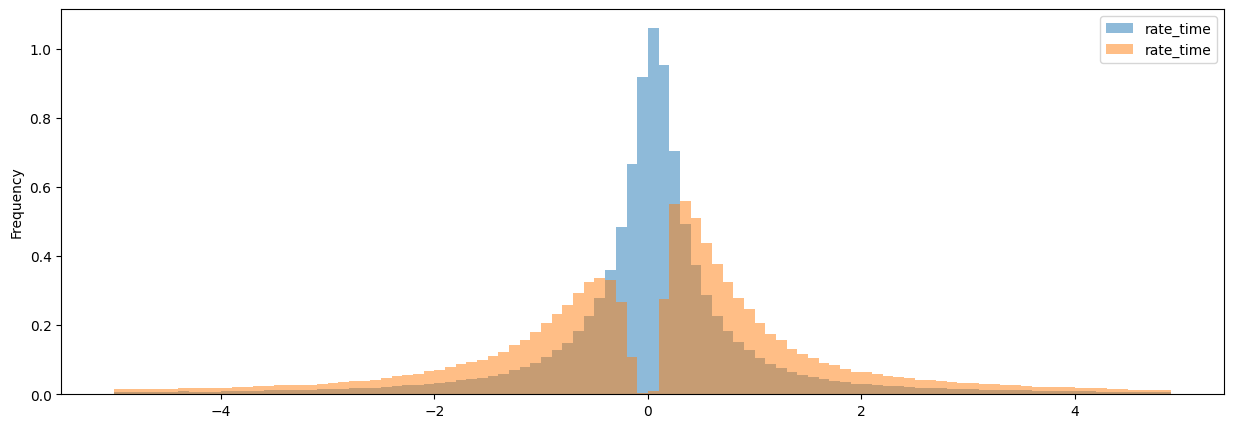

In [47]:
change_geomorph.rate_time.plot.hist(alpha=0.5, bins=np.arange(-5,5,0.1), legend=True, figsize=(15,5), density=True);
change_geomorph[change_geomorph.sig_time<0.01].rate_time.plot.hist(alpha=0.5, bins=np.arange(-5,5,0.1), legend=True, figsize=(15,5), density=True);
